# **Importar librerías**

In [3]:
#importar todas las bibliotecas necesarias.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
sns.set(style='whitegrid')

# Selección de características
from sklearn.feature_selection import RFE

# Escalador
from sklearn.preprocessing import MinMaxScaler

# Modeling, Evaluation
from sklearn.linear_model import LinearRegression


# **Cargar datos**

In [5]:
# Loading data into pandas DataFrame
df = pd.read_csv('data_house.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Los tipos de datos son numéricos y de cadena.

# **Verificar y Limpiar de datos**

Procedere a verificar los valores nulos patra esto usaré el metodo isna() para ese propósito. Antes de esto, eliminaré la columna de identificación que no necesitare para la realizacion de este modelo.

In [7]:
df.drop(['id'], axis=1, inplace=True)

In [8]:
df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Como se logra ver las caracteristicas de view tiene 63 valores nulos, seguido waterfront cuenta con 2376 y yr_renovated tiene 3842  valores nulos, los verificare para proceder con la limpieza.

## **Valores nulos**

**waterfront**

la descripción de este dato es "Casa que tiene vista a un frente al mar" Así que sus valores debe ser 1 y 0, procederé a verificar como se distribuyen sus valores.

In [9]:
df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


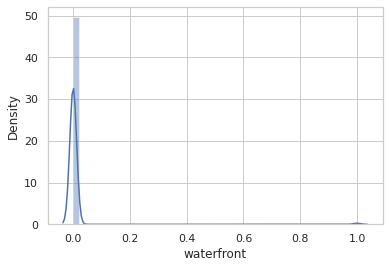

In [10]:
sns.distplot( df[df.waterfront.notna()]['waterfront'] )

Como se puede ver el número de valores de 1 es comparativamente demasiado pequeño, no afectaría tanto convertir el resto de valores nulos en 0 y se conserva el resto de los datos para las demás características en esas filas.

In [11]:
df.waterfront=df.waterfront.fillna(0)

**view**

La descripción de view es "Ha sido visto". este valor puede ser 1 o 0, o la cantidad de veces que se vio la casa, procederé a verificar como se distribuyen sus valores.

In [12]:
df.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

procedemos a ver como se distribuye la vista.

# de valores faltantes en la columna de vista 63


Text(0, 0.5, '# de casas')

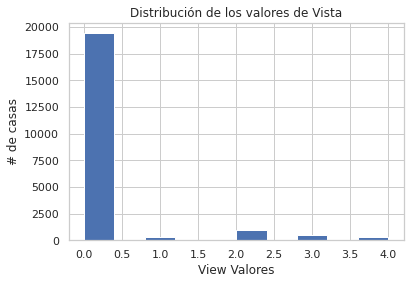

In [13]:
print("# de valores faltantes en la columna de vista", df.view.isna().sum())

df.view.hist()
plt.title("Distribución de los valores de Vista")
plt.xlabel("View Valores")
plt.ylabel("# de casas")

Los valores de faltan en la vista son número pequeños y el valor de "0" es muy grande. Se procede a remplazar todos los valores nulos en "0".

In [14]:
df.view=df.view.fillna(0)
print("#  valores faltantes en la columna de view", df.view.isna().sum())

#  valores faltantes en la columna de view 0


**yr_renovated**





In [15]:
df.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

Procedere a verificar la siguiente funcion con la de la fecha, debido a que ya existe yr_built por año.

In [16]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Text(0, 0.5, 'Número de Casa Renovada')

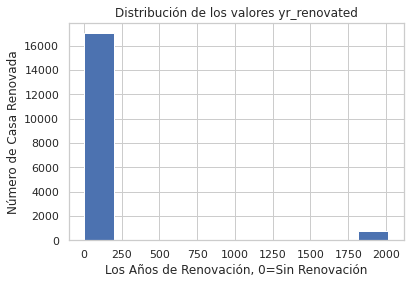

In [17]:
df.yr_renovated.hist()
plt.title("Distribución de los valores yr_renovated")
plt.xlabel("Los Años de Renovación, 0=Sin Renovación")
plt.ylabel("Número de Casa Renovada")

Comparo los valores y al parecer no existe relación, debido a esto debido a que **yr_renovated** tiene valores nulos, los llenaré con "0", además el número de casas renovadas es muy pequeño.

In [18]:
df.yr_renovated=df.yr_renovated.fillna(0)
df.yr_renovated[df.yr_renovated!=0]=1
df.yr_renovated.value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0.0    20853
1.0      744
Name: yr_renovated, dtype: int64

**Marcadores de lugar**

Se verificó los valores nulos de todas las características. Existe un marcador de posición en **sqft_basement**. Es el"?", de igual forma es de tipo objeto, lo convertiré en flotante, pero antes debo convertir el valor de cadena"?" en Nan.

In [19]:
df.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [20]:
#Contar el numero "?"" del registro
df.sqft_basement[df.sqft_basement=='?'].count()

454

In [21]:
df['sqft_basement'] = np.where(
    df.sqft_basement.eq('?'), np.NaN, df['sqft_basement'] .str[:-1]
)

In [22]:
# convierto el dato en float
df.sqft_basement=df.sqft_basement.astype('float')

Se procedió a llenar los valores Nan en esta columna, ahora procederé a ver si existe una relación entre las características **sqft_basement**, **sqft_above**, **sqft_living**. Por lo que se puede notar que **sqft_basement** es la diferencia de las otras dos características. Se reemplaza toda la columna **sqrt_basement** con este calculo.

In [23]:
df[['sqft_basement', 'sqft_above', 'sqft_living']].head()

,sqft_basement,sqft_above,sqft_living
0,0.0,1180,1180
1,400.0,2170,2570
2,0.0,770,770
3,910.0,1050,1960
4,0.0,1680,1680


In [24]:
df['sqft_basement'] = df [ 'sqft_living']- df['sqft_above']

In [25]:
df.sqft_basement.value_counts().head()

0      13110
600      221
700      218
500      214
800      206
Name: sqft_basement, dtype: int64

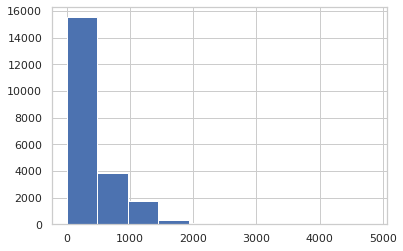

In [26]:
df.sqft_basement.hist()

In [27]:
df['sqft_basement']

0          0
1        400
2          0
3        910
4          0
        ... 
21592      0
21593      0
21594      0
21595      0
21596      0
Name: sqft_basement, Length: 21597, dtype: int64

Existe una gran cantidad de 0 por lo que convertiré estos 1 y 0.

In [32]:
df.sqft_basement[df.sqft_basement!=0]=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Una vez transformado los datos, procederé a convertir el tipo de "date" a "datetime.

In [33]:
df['date'] = pd.to_datetime(df['date'])

In [34]:
df['date'] 

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

# **Correlación**

Antes de verificar las etiquetas, se procede a verificar la matriz de correlación para ver si se debe eliminar una columna.

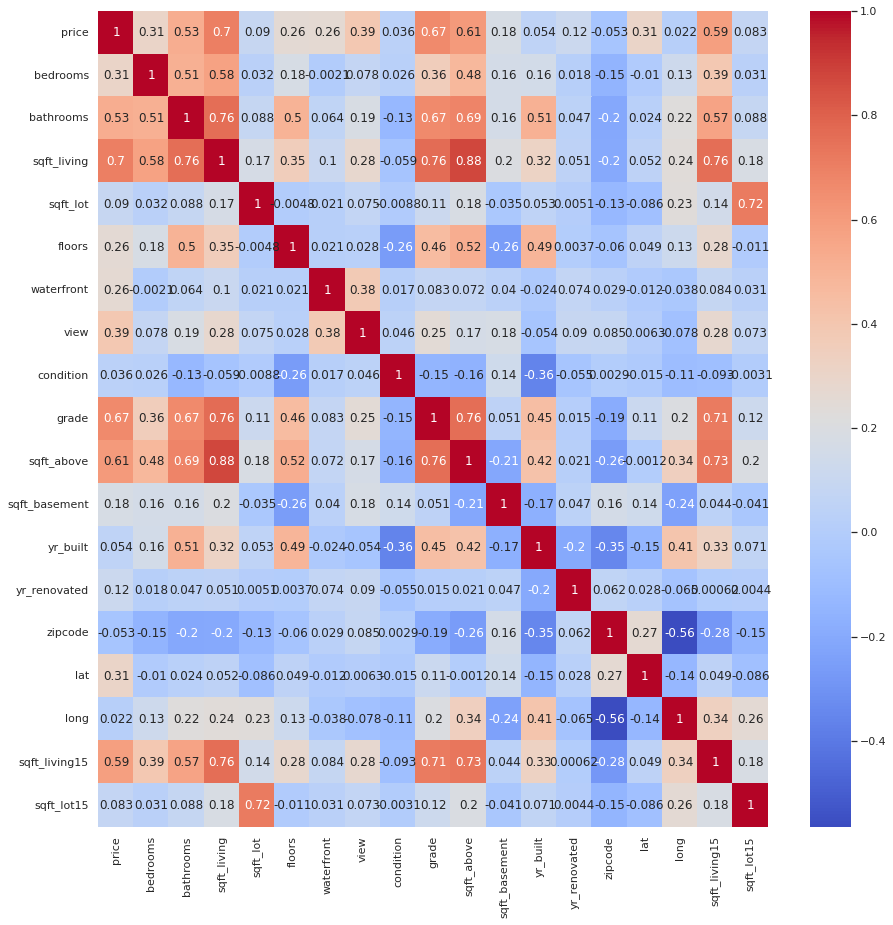

In [35]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.savefig('heatmap.png')

Como se puede notar existe una gran correlación entre sqft_above, bathrooms y sqft_living.

In [36]:
abs(df.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False


In [37]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.393497
bedrooms         0.308787
lat              0.306692
waterfront       0.264306
floors           0.256804
sqft_basement    0.180082
yr_renovated     0.117543
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
zipcode         -0.053402
Name: price, dtype: float64

La correlación con el código postal es negativa por lo que se borrara de igual manera el código postal.

In [38]:
df=df.drop('sqft_above', axis=1)
df=df.drop('grade', axis=1)
df=df.drop('bathrooms', axis=1)
df=df.drop('zipcode', axis=1)

# **Binning** (Año de construcción, Coordenada de latitud, Coordenada de longitud)

In [39]:
df.isna().sum()

date             0
price            0
bedrooms         0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [40]:
# Binning yr_built

df.yr_built.describe()

contenedor = [1900,1930,1960,1990,2020]
labels = ['1900_1930', '1930_1960','1960_1990','1990_2020']
contenedor = pd.cut(df['yr_built'], contenedor , labels = labels ) 
contenedor = contenedor.cat.as_unordered()
df.yr_built=contenedor

#Binning long
segmentos = 10
bins = list(np.linspace(df.long.min(), df.long.max(), num=segmentos))
labels = [i for i in range(1,segmentos)]
df.long = pd.cut(df.long, bins, labels=labels)

#Binning lat
segments = 10
bins = list(np.linspace(df.lat.min(), df.lat.max(), num=segments))
bins
labels = [i for i in range(1,segments)]
df.lat = pd.cut(df.lat, bins, labels=labels)

In [41]:
df['yr_built']

0        1930_1960
1        1930_1960
2        1930_1960
3        1960_1990
4        1960_1990
           ...    
21592    1990_2020
21593    1990_2020
21594    1990_2020
21595    1990_2020
21596    1990_2020
Name: yr_built, Length: 21597, dtype: category
Categories (4, object): ['1900_1930', '1930_1960', '1960_1990', '1990_2020']

**Tipos de categoría**
Siguiente realizare la conversión dee nueve características al tipo de categoría. Los pondré en una lista y haré esta tarea en un bucle.


In [42]:
# Floors tiene valores decimales y durante hot encoding eso será un problema. 
# Primero los redondeo a un dígito y los convierto a int para no tener "." en nombres ficticios.
# Realmente sucedió y tuve que volver a esta parte y solucionar el problema

df=df.round({'floors': 0})
df.floors=df.floors.astype(int)
df.waterfront=df.waterfront.astype(int)
df.view=df.view.astype(int)

cat_list=['yr_built','condition','long','lat','waterfront','floors','view', 'bedrooms','sqft_basement']

In [44]:
df_cat=pd.DataFrame()
for i in cat_list:
    df_cat[i]=df[i].astype('category')

# **One-Hot-Encoding**

Usaré la misma lista, generaré los dummies , seguido agregaré el marco de datos y eliminaré la columna original

In [45]:
for i in cat_list:
    dummies=pd.get_dummies(df_cat[i],prefix=i, drop_first=True)
    df_cat=df_cat.join(dummies)
    df_cat.drop([i], axis=1, inplace=True)

In [ ]:
#verificar si todo se ve bien.

df_cat.head(3)


,yr_built_1930_1960,yr_built_1960_1990,yr_built_1990_2020,condition_2,condition_3,condition_4,condition_5,long_2,long_3,long_4,long_5,long_6,long_7,long_8,long_9,lat_2,lat_3,lat_4,lat_5,lat_6,lat_7,lat_8,lat_9,waterfront_1,floors_2,floors_3,floors_4,view_1,view_2,view_3,view_4,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,bedrooms_33,sqft_basement_1
0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


# **Escalado y Normalización**

**características sesgadas**

Utilizaré la transformación de cuantiles  para poder corregir la asimetría y escalarlas.

In [46]:
from sklearn.preprocessing import quantile_transform
df_cont=df.loc[:,['price','sqft_living','sqft_lot','sqft_living15','sqft_lot15']] 

transformar = quantile_transform(df_cont[['price','sqft_living','sqft_lot','sqft_living15','sqft_lot15']],
                                    output_distribution = 'normal')

trans_features = pd.DataFrame(transformar)
trans_features.columns=['price','sqft_living','sqft_lot','sqft_living15','sqft_lot15']

In [47]:
trans_features.head()

,price,sqft_living,sqft_lot,sqft_living15,sqft_lot15
0,-1.524727,-1.109378,-0.517790,-1.037937,-0.517790
1,0.325577,0.694311,-0.115464,-0.247134,0.007616
2,-2.013671,-2.131682,0.562796,1.064091,0.154186
3,0.559811,0.051460,-0.718462,-0.985610,-0.744694
4,0.226489,-0.293986,0.128003,-0.062770,-0.040336


In [48]:
df_final=pd.concat([trans_features, df_cat], axis=1)

In [49]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 48 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               21597 non-null  float64
 1   sqft_living         21597 non-null  float64
 2   sqft_lot            21597 non-null  float64
 3   sqft_living15       21597 non-null  float64
 4   sqft_lot15          21597 non-null  float64
 5   yr_built_1930_1960  21597 non-null  uint8  
 6   yr_built_1960_1990  21597 non-null  uint8  
 7   yr_built_1990_2020  21597 non-null  uint8  
 8   condition_2         21597 non-null  uint8  
 9   condition_3         21597 non-null  uint8  
 10  condition_4         21597 non-null  uint8  
 11  condition_5         21597 non-null  uint8  
 12  long_2              21597 non-null  uint8  
 13  long_3              21597 non-null  uint8  
 14  long_4              21597 non-null  uint8  
 15  long_5              21597 non-null  uint8  
 16  long

# **Hallar X, Y**

In [50]:
y = df_final.price 
y=y.astype('int')
X = df_final.drop(['price'], axis=1)

# **Dividir el dataset en training and testing**

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [52]:
print("Datos de entrenamiento",X_train.shape, y_train.shape)
print("Datos de prueba",X_test.shape, y_test.shape)


Datos de entrenamiento (15117, 47) (15117,)
Datos de prueba (6480, 47) (6480,)


# **Selección de características con RFE y Random Forest**

In [53]:
from sklearn.feature_selection import RFE

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 20)
selector = selector.fit(X, y)
top20=X[X.columns[selector.support_]]

top20.columns

Index(['sqft_living', 'condition_2', 'condition_3', 'condition_4',
       'condition_5', 'long_6', 'long_8', 'long_9', 'lat_6', 'lat_7', 'lat_8',
       'lat_9', 'waterfront_1', 'view_1', 'view_2', 'view_3', 'view_4',
       'bedrooms_9', 'bedrooms_10', 'bedrooms_11'],
      dtype='object')

In [54]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(max_depth=7, n_estimators=100)
RF.fit(X_train, y_train)
y_pred_RF= RF.predict(X_test)

df_final = pd.DataFrame()

cols = ['Machine Learning Classification Method',
        'Train Accuracy', 
        'Test Accuracy', 
        "Top 1 Feature Predictor",
        "Top 2 Feature Predictor",
        "Top 3 Feature Predictor",
        "Top 4 Feature Predictor",
        "Top 5 Feature Predictor"]

df_final.loc['Machine Learning Classification Method', 
       'Details'] = 'Random Forest Classifier'
df_final.loc['Train Accuracy', 'Details'] = RF.score(X_train, y_train) 
df_final.loc['Test Accuracy', 'Details'] = RF.score(X_test, y_test)

feature_importances = X.columns[np.argsort(RF.feature_importances_)][-5:]
df_final.loc['Top 1 Feature Predictor', 'Details'] = feature_importances[4]
df_final.loc['Top 2 Feature Predictor', 'Details'] = feature_importances[3]
df_final.loc['Top 3 Feature Predictor', 'Details'] = feature_importances[2]
df_final.loc['Top 4 Feature Predictor', 'Details'] = feature_importances[1]
df_final.loc['Top 5 Feature Predictor', 'Details'] = feature_importances[0]

display(df_final)

,Details
Machine Learning Classification Method,Random Forest Classifier
Train Accuracy,0.760601
Test Accuracy,0.753395
Top 1 Feature Predictor,sqft_living
Top 2 Feature Predictor,sqft_living15
Top 3 Feature Predictor,lat_3
Top 4 Feature Predictor,sqft_lot
Top 5 Feature Predictor,lat_8


# **Generación del archivo csv con los datos limpios**

In [55]:
#Exportar DataFrame a CSV
ruta = "clean_house_data.csv"
df_final.to_csv(ruta)